In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

year = int(input('Enter the year: '))
title = 'Objects Acquired by Department for the Harvard Art Museum in ' + str(year)

def acquire():
    data = pd.read_csv('hartvard.csv')
    return data

def wrangle(df):
    df.Acquired.astype(float) #format year 'Acquired' to display as int, not float
    pd.options.display.float_format = '{:.0f}'.format
    filtered = data[data['Acquired']==year]
    return filtered

def analyze(df):
    # Count all objects acquired by each Department for given year
    grouped = filtered.groupby('Department').agg({'Acquired':'count'}).reset_index()
    results = grouped.sort_values('Acquired', ascending=False)
    return results

def visualize(df):
    df.rename(index=str, columns={"Acquired": "Number of Objects Acquired" + str(year)}) #rename column
    fig, ax = plt.subplots(figsize=(15,8))
    barchart = sns.barplot(data=df, x='Department', y='Acquired')
    plt.title(title + "\n", fontsize=16)
    
    # Rotate the X-Axis Labels to prevent overlapping
    ax = sns.countplot(x="Department", data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    plt.tight_layout()
    return barchart

def save_viz(barchart):
    fig = barchart.get_figure()
    fig.savefig(title + '.png')

Enter the year: 1999


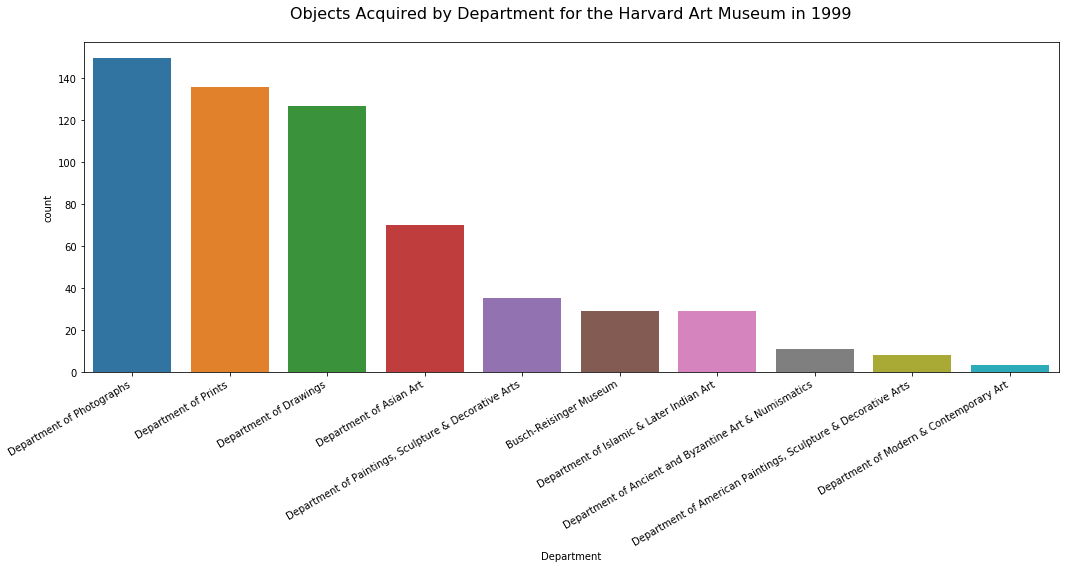

In [2]:
data = acquire()
filtered = wrangle(data)
if filtered.empty:
    print("ERROR: No objects acquired in given year. Try a year between 1918-2018 for best results")
else:
    results = analyze(filtered)        
    barchart = visualize(results)
    save_viz(barchart)